Text Processing and Machine Learning
====================================

- quick overview on natural language processing
- linear regression and classification
- pre-processing and tokenization (splitting text into words)
- n-grams, vectorization and word embeddings
- train and evaluate a text classifier
- a short look into [Hugging Face's transformers library](https://huggingface.co/transformers/)


## Natural Language Processing

[Natural language processing (NLP)](https://en.wikipedia.org/wiki/Natural_language_processing) is about programming computers to process and analyze natural language data (text and speech).

For Python, there are two main NLP modules:
- [spaCy](https://spacy.io/) or [spaCy on pypi](https://pypi.org/project/spacy/)
- [NLTK](https://www.nltk.org/) or [NLTK on pypi](https://pypi.org/project/nltk/)

Both modules implement the following NLP applications (and more), at least, for some languates:
- named entity recognition (NER)
- sentiment detection
- tokenization: splitting a text into words (aka. tokens)
- part-of-speech tagging (POS)
- lemmatization: mapping a word in text to its base form (aka. lemma)
- syntax parsing
- semantic representation of words

We'll first look into spaCy to explore NLP applications. Later, during the text classification we'll also touch some aspects of NLP, namely tokenization and the semantic representation of words in a vector space (word embeddings).

Work with spaCy also requires to install code modules for the natural languages to be processed:

In [1]:
%%script false --no-raise-error
# comment the above instruction to run this code
#
# spaCy installation and core modules for English and German
# - https://spacy.io/models/en
# - https://spacy.io/models/de
# note: download modules only once!
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

In [2]:
import spacy

nlp = spacy.load("de_core_news_sm")

# we use a text from notebook 4 "Web Scraping"
text = 'Geboren am 16. Mai 1980 in Ahaus; römisch-katholisch.Nach dem Abitur Ausbildung zum Bankkaufmann, anschließend Angestellter; Studium der Politikwissenschaften (M.A.).Seit 1997 Mitglied der CDU; seit 2005 Vorsitzender des CDU-Kreisverbandes Borken; seit Dezember 2014 Mitglied des CDU-Bundespräsidiums.Mitglied des Bundestages seit 2002; 2015 bis März 2018 Parlamentarischer Staatssekretär beim Bundesminister der Finanzen; März 2018 bis Dezember 2021 Bundesminister für Gesundheit; seit Dezember 2021 stellvertretender Vorsitzender der CDU/CSU-Bundestagsfraktion.'

doc = nlp(text)

doc.to_json()

{'text': 'Geboren am 16. Mai 1980 in Ahaus; römisch-katholisch.Nach dem Abitur Ausbildung zum Bankkaufmann, anschließend Angestellter; Studium der Politikwissenschaften (M.A.).Seit 1997 Mitglied der CDU; seit 2005 Vorsitzender des CDU-Kreisverbandes Borken; seit Dezember 2014 Mitglied des CDU-Bundespräsidiums.Mitglied des Bundestages seit 2002; 2015 bis März 2018 Parlamentarischer Staatssekretär beim Bundesminister der Finanzen; März 2018 bis Dezember 2021 Bundesminister für Gesundheit; seit Dezember 2021 stellvertretender Vorsitzender der CDU/CSU-Bundestagsfraktion.',
 'ents': [{'start': 27, 'end': 32, 'label': 'LOC'},
  {'start': 189, 'end': 192, 'label': 'ORG'},
  {'start': 221, 'end': 246, 'label': 'ORG'},
  {'start': 280, 'end': 300, 'label': 'MISC'},
  {'start': 394, 'end': 421, 'label': 'LOC'},
  {'start': 451, 'end': 480, 'label': 'ORG'},
  {'start': 536, 'end': 539, 'label': 'ORG'},
  {'start': 540, 'end': 562, 'label': 'MISC'}],
 'sents': [{'start': 0, 'end': 33},
  {'start':

What does the JSON representation of the short text contain? Which NLP applications are involved?

In [3]:
# filter tokens tagged as nouns
list(filter(lambda t: t.pos_ == 'NOUN', doc))

[Mai,
 Abitur,
 Ausbildung,
 Bankkaufmann,
 Angestellter,
 Studium,
 Politikwissenschaften,
 Mitglied,
 Vorsitzender,
 CDU-Kreisverbandes,
 Borken,
 Dezember,
 Mitglied,
 CDU-Bundespräsidiums,
 Mitglied,
 Bundestages,
 März,
 Staatssekretär,
 Bundesminister,
 Finanzen,
 März,
 Dezember,
 Bundesminister,
 Gesundheit,
 Dezember,
 Vorsitzender,
 CDU,
 /,
 CSU-Bundestagsfraktion]

For some NLP applications, spaCy provides [nice visualizations](https://spacy.io/usage/visualizers):
- [named entities](https://en.wikipedia.org/wiki/Named-entity_recognition)
- syntax trees of [dependency parsing](https://en.wikipedia.org/wiki/Dependency_grammar)

In [4]:
from spacy import displacy

displacy.render(doc, style="ent")

In [5]:
displacy.render(doc, style="dep")

## Machine Learning

The field of machine learning is too broad to be fully introduced here. Please, see [Google's machine learning crash course](https://developers.google.com/machine-learning/crash-course/ml-intro). We'll focus on a couple of examples and introduce ML libraries written in or providing a Python API.

- [scikit-learn](https://scikit-learn.org/): popular Python ML framework covering regression, classification and clustering using various approaches
- [fastText](https://fasttext.cc/): a library for text classification and word representation learning with Python bindings
- [TensorFlow](https://www.tensorflow.org/): ML framework with Python bindings focused on deep neural networks
- [Keras](https://keras.io/): high-level API to Tensorflow
- [PyTorch](https://pytorch.org/): competitor of Tensorflow
- [Transformers](https://huggingface.co/transformers/): library to use, train and adapt [transformer deep learning models](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model))

Before we begin to look into Python ML examples, few ML key terms:
- label: something we want to predict
- feature: variable in the input (eg. numeric value, words)
- example: data to learn from during training (labeled example) or to predict the label for using a learned model
- model: a model is trained on labeled input data and later used to make predictions ("infer" labels) for unlabeled examples
- regression vs. classification: labels are continuous vs. categorical values

## Linear Regression and Classification with Scikit-Learn

As an example for linear regression we take few trees from the tree cadastre used in [notebook 2](./2_structured_data_tree_cadastre_konstanz.ipynb). We select a small subset of trees species to work with.

<IPython.core.display.Javascript object>


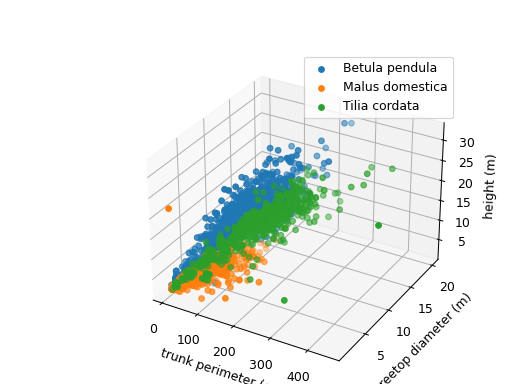

In [40]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt

tree_cadastre_file = 'data/KN_Baumkataster_2020.csv'
df = pd.read_csv(tree_cadastre_file)

df.rename(columns={'hoeheM': 'height (m)',
                   'kronendurchmesserM': 'treetop diameter (m)',
                   'stammumfangCM': 'trunk perimeter (cm)'},
          inplace=True)
df_all_trees = df

# could try the top N trees
#N = 6
#top_trees = df['Name_lat'].value_counts().head(N).to_frame()
#selected_trees = top_trees.index

# instead, we choose 3 trees quite different in shape:
# - birch : tall and high, thinner trunk
# - lime tree : broad, thicker trunk
# - apple tree : small, not tall
selected_trees = ['Betula pendula', 'Tilia cordata', 'Malus domestica']

metric_columns = ['trunk perimeter (cm)', 'treetop diameter (m)', 'height (m)']

df = df[df['Name_lat'].isin(selected_trees)][['Name_lat', *metric_columns]]

# prepare a 3D plot to show how the trees are placed given the 3 metrics 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for name, idx in df.groupby('Name_lat').groups.items():
    ax.scatter(*df.loc[idx, metric_columns].T.values, label=name)

ax.set_xlabel(metric_columns[0])
ax.set_ylabel(metric_columns[1])
ax.set_zlabel(metric_columns[2])

ax.legend()
plt.show()

In [41]:
# linear regression: predict trunk perimeter and treetop diameter given the height

import numpy as np
from sklearn.linear_model import LinearRegression

for tree in selected_trees:

    # select rows by tree in loop
    d = df[df['Name_lat']==tree].dropna()

    # convert metric cells to numpy arrays
    height = d[metric_columns[2]].values.reshape(-1,1)
    treetop_trunk = d[metric_columns[0:2]].values.reshape(-1,2)

    rgr = LinearRegression()
    rgr.fit(height, treetop_trunk)

    print(tree)
    for height in [2, 5, 10, 15, 20]:
        print(height, rgr.predict(np.array([[height]])))
    print()
        

Betula pendula
2 [[18.50448984  1.13475045]]
5 [[40.26100411  2.42970328]]
10 [[76.52186123  4.587958  ]]
15 [[112.78271835   6.74621271]]
20 [[149.04357547   8.90446743]]

Tilia cordata
2 [[21.35878424  1.8773699 ]]
5 [[54.22855546  3.59077637]]
10 [[109.01150751   6.4464538 ]]
15 [[163.79445956   9.30213124]]
20 [[218.57741161  12.15780867]]

Malus domestica
2 [[24.58206233  1.4661875 ]]
5 [[67.07429191  4.07683903]]
10 [[137.89467456   8.42792492]]
15 [[208.71505721  12.77901081]]
20 [[279.53543986  17.1300967 ]]



See also the scikit-learn documentation about [linear models](https://scikit-learn.org/stable/modules/linear_model.html).

The [neural network classifier](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification) used in the next example uses as input features the 3 metric columns and tries to predict the species of a tree. How are the results given that only 3 tree species are used. What if we use more or even all species?

In [43]:
import sklearn

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# split data into train and test data (80% resp. 20% of the data)
train, test = train_test_split(df.dropna(), test_size=0.2)

cls = MLPClassifier(alpha=1, max_iter=1000)

x_train = train[metric_columns].values.reshape(-1,3)
y_train = train[['Name_lat']].values.reshape(-1,1).ravel()

x_test = test[metric_columns].values.reshape(-1,3)
y_test = test[['Name_lat']].values.reshape(-1,1).ravel()

cls.fit(x_train, y_train)

# print results for predictions on test data
y_predicted = cls.predict(x_test)
print(
    f"Classification report for classifier {cls}:\n"
    f"{sklearn.metrics.classification_report(y_test, y_predicted)}\n"
)

Classification report for classifier MLPClassifier(alpha=1, max_iter=1000):
                 precision    recall  f1-score   support

 Betula pendula       0.80      0.87      0.83       154
Malus domestica       0.81      0.95      0.88       106
  Tilia cordata       0.82      0.62      0.70       131

       accuracy                           0.81       391
      macro avg       0.81      0.81      0.80       391
   weighted avg       0.81      0.81      0.80       391




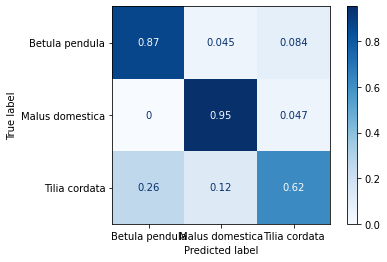

In [44]:
# print a confusion matrix: which tree species are predicted better? which ones are confused more often?
%matplotlib inline

sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, normalize='true', cmap='Blues')

## Text Classification with fastText

[fastText](https://fasttext.cc/) is a software library for text
classification and word representation learning. See the fastText
tutorials for

- [text classification](https://fasttext.cc/docs/en/supervised-tutorial.html)
- [word representation learning](https://fasttext.cc/docs/en/unsupervised-tutorial.html)

We will now follow the [fastText text
classification](https://fasttext.cc/docs/en/supervised-tutorial.html)
tutorial (cf. documentation of the [Python module
"fasttext"](https://pypi.org/project/fasttext/)) to train and apply
a text classifier.


The fastText tutorial uses the StackExchange cooking data set. We will use the [Kaggle Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview) data set. In order to download the data set, you need to register at [Kaggle.com](https://www.kaggle.com/). Note: Kaggle is a good place to look and learn how other researchers and engineers tried to solve various ML problems.

After the data set is downloaded and unpacked into the folder `data/kaggle-jigsaw-toxic`, you should see the tree files `train.csv`, `test.csv` and `test_labels.csv` in the mentioned folder. 

In [6]:
import pandas as pd

df_train = pd.read_csv('data/kaggle-jigsaw-toxic/train.csv')

#df.head()

In [7]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

df_train[labels].mean()

toxic            0.095844
severe_toxic     0.009996
obscene          0.052948
threat           0.002996
insult           0.049364
identity_hate    0.008805
dtype: float64

Only 10% of the comments are toxic. What does it mean for building a classifier?

In [8]:
# tokenize the comments
import string

from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer(reduce_len=True)

def tokenize(text):
    global tweet_tokenizer
    words = tweet_tokenizer.tokenize(text)
    words = filter(lambda w: w != ''
                             and w not in string.punctuation, words)
    words = map(lambda w: w.lower(), words)
    return ' '.join(words)

tokenize("You're a hero! http://example.com/index.html")

"you're a hero http://example.com/index.html"

In [9]:
# write data to fastText train file

train_file = 'data/kaggle-jigsaw-toxic/train.txt'

def write_line_fasttext(fp, row):
    global labels
    line = ''
    for label in labels:
        if row[label] == 1:
            if line:
                line += ' '
            line += '__label__' + label
    if line:
        line += ' '
    else:
        line += '__label__none '
    line += tokenize(row['comment_text'])
    fp.write(line)
    fp.write('\n')

with open(train_file, 'w') as fp:
    df_train.apply(lambda row: write_line_fasttext(fp, row), axis=1)

In [10]:
!pip install fasttext

In [11]:
# train a model

import fasttext

model = fasttext.train_supervised(input=train_file, wordNgrams=2, minCount=2)

In [38]:
model.predict(tokenize("This is a well-written article."))
# model.predict(tokenize("Fuck you!"), k=5)

(('__label__obscene',
  '__label__insult',
  '__label__toxic',
  '__label__severe_toxic',
  '__label__identity_hate'),
 array([0.41425505, 0.32454872, 0.18850109, 0.06784596, 0.00485881]))

In [13]:
# looking into the underlying word embeddings

model.get_nearest_neighbors('idiot', k=20)

[(0.9997887015342712, 'stupid'),
 (0.9996612668037415, 'moron'),
 (0.9996005296707153, 'jerk'),
 (0.9994908571243286, 'arrogant'),
 (0.999340832233429, 'stupidity'),
 (0.999234139919281, 'pathetic'),
 (0.9992112517356873, 'coward'),
 (0.9991973042488098, 'fool'),
 (0.9991273880004883, 'ignorant'),
 (0.9991151690483093, 'disgusting'),
 (0.9990187883377075, 'idiotic'),
 (0.9989598393440247, 'jackass'),
 (0.9988994598388672, 'fascist'),
 (0.9988807439804077, 'morons'),
 (0.9988119602203369, 'fat'),
 (0.9987836480140686, 'hell'),
 (0.998756468296051, 'bloody'),
 (0.9987396001815796, 'sucked'),
 (0.9987378716468811, 'anal'),
 (0.9987097382545471, 'losers')]

In [14]:
# save the model
model_file = 'data/kaggle-jigsaw-toxic/model.bin'

model.save_model(model_file)

In [15]:
df_test = pd.read_csv('data/kaggle-jigsaw-toxic/test.csv')
df_test_labels = pd.read_csv('data/kaggle-jigsaw-toxic/test_labels.csv')

# join both tables
df_test = df_test.merge(df_test_labels, on='id')

# skip rows not labelled / not used
df_test = df_test[df_test['toxic'] != -1]

test_file = 'data/kaggle-jigsaw-toxic/test.txt'

# write test set for fastText
with open(test_file, 'w') as fp:
    df_test.apply(lambda row: write_line_fasttext(fp, row), axis=1)

### Model Validation

See also: [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [16]:
model.test(test_file)

(63978, 0.9302416455656632, 0.8239308903132917)

In [17]:
res_per_label = model.test_label(test_file)

for label in res_per_label.items():
    print(label)

('__label__threat', {'precision': nan, 'recall': 0.0, 'f1score': 0.0})
('__label__identity_hate', {'precision': nan, 'recall': 0.0, 'f1score': 0.0})
('__label__severe_toxic', {'precision': 0.3076923076923077, 'recall': 0.07629427792915532, 'f1score': 0.1222707423580786})
('__label__insult', {'precision': 0.75, 'recall': 0.005252407353370295, 'f1score': 0.010431758910460736})
('__label__obscene', {'precision': 0.9448275862068966, 'recall': 0.1113519371444053, 'f1score': 0.1992244304411052})
('__label__toxic', {'precision': 0.5900198468953786, 'recall': 0.683415435139573, 'f1score': 0.6332927571515521})
('__label__none', {'precision': 0.9737822400397347, 'recall': 0.9508270546462284, 'f1score': 0.9621677518863543})


In [37]:
# in case the fastText command-line tool is installed: it has a nice output formatter
!fasttext test-label \
   data/kaggle-jigsaw-toxic/model.bin \
   data/kaggle-jigsaw-toxic/test.txt

F1-Score : 0.962168  Precision : 0.973782  Recall : 0.950827   __label__none
F1-Score : 0.633293  Precision : 0.590020  Recall : 0.683415   __label__toxic
F1-Score : 0.199224  Precision : 0.944828  Recall : 0.111352   __label__obscene
F1-Score : 0.010432  Precision : 0.750000  Recall : 0.005252   __label__insult
F1-Score : 0.122271  Precision : 0.307692  Recall : 0.076294   __label__severe_toxic
F1-Score : 0.000000  Precision : --------  Recall : 0.000000   __label__identity_hate
F1-Score : 0.000000  Precision : --------  Recall : 0.000000   __label__threat
N	63978
P@1	0.930
R@1	0.824


## Transformer Language Models and the Transformers Library

[Transformer language models](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)) are used to address a couple of NLP tasks -- text classification, text generation, translation and more. [Hugging Face's transformers library](https://huggingface.co/transformers/) provides an powerful and easy to learn interface to use transformers. Hugging Face also offers a large repository of transformer models shared by a growing community of researchers and organizations. For more details exceeding the examples below, see the [transformers course](https://huggingface.co/course).
  
Transformers can be "fine-tuned" to a specific task, see [training of transformers](https://huggingface.co/transformers/training.html). Adding a task-specific head to a transformer pre-trained on large amounts of training data (usually 100 GBs or even TBs of text) saves resources spent for training and can overcome the problem of not enough training data. Manually labelling training data is expensive and naturally puts a limit on the amount of training data. But even if the vocabulary in the training data is limited, there's a good chance that the pre-trained transformer has seen the unknown words in the huge data used for pre-training.

In [19]:
!pip install transformers
!pip install tensorflow
!pip install "transformers[sentencepiece]"

In [20]:
from transformers import pipeline

p = pipeline('fill-mask', model='bert-base-german-cased')

Some weights of the model checkpoint at bert-base-german-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
for s in p("Er arbeitet als [MASK]."): print(s)

{'sequence': 'Er arbeitet als Rechtsanwalt.', 'score': 0.09919334203004837, 'token': 6143, 'token_str': 'Rechtsanwalt'}
{'sequence': 'Er arbeitet als Trainer.', 'score': 0.07836302369832993, 'token': 3674, 'token_str': 'Trainer'}
{'sequence': 'Er arbeitet als Journalist.', 'score': 0.0628521665930748, 'token': 10486, 'token_str': 'Journalist'}
{'sequence': 'Er arbeitet als Anwalt.', 'score': 0.05725342780351639, 'token': 6938, 'token_str': 'Anwalt'}
{'sequence': 'Er arbeitet als Schauspieler.', 'score': 0.05046413466334343, 'token': 5607, 'token_str': 'Schauspieler'}


In [22]:
pipeline_fill_mask = pipeline('fill-mask', model='bert-base-german-cased')

def fill_mask(cloze):
    global pipeline_fill_mask
    for s in pipeline_fill_mask(cloze):
        print('%-20s\t%.5f' % (s['token_str'], s['score']))

Some weights of the model checkpoint at bert-base-german-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
fill_mask("Er arbeitet als [MASK] in einer Klinik.")

Arzt                	0.61843
Angestellter        	0.04225
Koch                	0.03064
Assistent           	0.02001
Mediziner           	0.01900


In [24]:
fill_mask("Er arbeitet als [MASK] in einer Lungenklinik.")

Arzt                	0.69560
Angestellter        	0.03423
Chemiker            	0.02711
Facharzt            	0.02113
Mediziner           	0.02024


In [25]:
fill_mask("Er arbeitet als [MASK] bei BMW.")

Ingenieur           	0.18871
Berater             	0.17160
Manager             	0.15090
Geschäftsführer     	0.07775
Trainer             	0.04951


In [26]:
fill_mask("Er arbeitet als [MASK] an der Universität Konstanz.")

Professor           	0.74687
Dozent              	0.11445
Hochschullehrer     	0.08565
Wissenschaftler     	0.00667
Assistent           	0.00427


In [27]:
fill_mask("Sie arbeitet als [MASK] an der Universität Konstanz.")

Professor           	0.52318
Lehrerin            	0.09859
Dozent              	0.08542
Professur           	0.04144
Richterin           	0.02292


In [28]:
fill_mask("Sie ist wirklich [MASK].")

schön               	0.11005
jung                	0.06098
glücklich           	0.05704
toll                	0.05053
gut                 	0.03495


In [29]:
fill_mask("Er ist wirklich [MASK].")

gut                 	0.05452
glücklich           	0.05183
da                  	0.03765
jung                	0.03233
tot                 	0.03229


In [30]:
help(pipeline)

Help on function pipeline in module transformers.pipelines:

pipeline(task: str, model: Optional = None, config: Union[str, transformers.configuration_utils.PretrainedConfig, NoneType] = None, tokenizer: Union[str, transformers.tokenization_utils.PreTrainedTokenizer, NoneType] = None, feature_extractor: Union[str, ForwardRef('SequenceFeatureExtractor'), NoneType] = None, framework: Optional[str] = None, revision: Optional[str] = None, use_fast: bool = True, use_auth_token: Union[bool, str, NoneType] = None, model_kwargs: Dict[str, Any] = {'use_auth_token': None}, **kwargs) -> transformers.pipelines.base.Pipeline
    Utility factory method to build a :class:`~transformers.Pipeline`.
    
    Pipelines are made of:
    
        - A :doc:`tokenizer <tokenizer>` in charge of mapping raw textual input to token.
        - A :doc:`model <model>` to make predictions from the inputs.
        - Some (optional) post processing for enhancing model's output.
    
    Args:
        task (:obj:`str`)

In [31]:
p = pipeline('sentiment-analysis')

p("I'm happy.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'POSITIVE', 'score': 0.9998724460601807}]

In [32]:
p("I'm sad.")

[{'label': 'NEGATIVE', 'score': 0.9994174242019653}]

In [33]:
p("I'm not happy.")

[{'label': 'NEGATIVE', 'score': 0.9998021721839905}]

In [34]:
import transformers

p = pipeline('ner', aggregation_strategy=transformers.pipelines.AggregationStrategy.SIMPLE)

p("""We would like to belatedly welcome Ulrich Glassmann of the Europa-Universität
  Flensburg (#EUF), who is currently a guest at the Cluster. Ulrich has just decided
  to extend his stay until the end of June, welcome news indeed!""")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


[{'entity_group': 'PER',
  'score': 0.9996402,
  'word': 'Ulrich Glassmann',
  'start': 35,
  'end': 51},
 {'entity_group': 'ORG',
  'score': 0.8913957,
  'word': 'Europa - Universität Flensburg',
  'start': 59,
  'end': 89},
 {'entity_group': 'ORG',
  'score': 0.988505,
  'word': 'EUF',
  'start': 92,
  'end': 95},
 {'entity_group': 'ORG',
  'score': 0.6957305,
  'word': 'Cluster',
  'start': 130,
  'end': 137},
 {'entity_group': 'PER',
  'score': 0.9996954,
  'word': 'Ulrich',
  'start': 139,
  'end': 145}]

In [35]:
p = pipeline('translation', model='facebook/wmt19-de-en')

p("""Nicht nur unterschiedliche Berechnungen bereiten Kopfzerbrechen.
  Bei der Eigenwahrnehmung zeigt sich: In Deutschland gibt es massive
  Missverständnisse über Ausmaß und Art von Ungleichheit.""")

[{'translation_text': 'It is not only different calculations that cause headaches. Self-perception shows that in Germany there are massive misunderstandings about the extent and type of inequality.'}]

In [36]:
p = pipeline('translation', model='facebook/wmt19-en-de')

p("""We would like to belatedly welcome Ulrich Glassmann of the Europa-Universität
  Flensburg (#EUF), who is currently a guest at the Cluster. Ulrich has just decided
  to extend his stay until the end of June, welcome news indeed!""")

[{'translation_text': 'Mit Verspätung begrüßen wir Ulrich Glassmann von der Europa-Universität Flensburg (# EUF), der derzeit zu Gast im Cluster ist. Er hat sich gerade entschieden, seinen Aufenthalt bis Ende Juni zu verlängern, eine gute Nachricht!'}]

For text generation capabilities of transformers, see the [demo page](https://transformer.huggingface.co/). Or the nice example models fine-tuned on tweets: https://huggingface.co/huggingtweets

Or run in the console:
```python
p = pipeline('text-generation', model='distilgpt2')
p("In Germany there are massive misunderstandings about the extent and type of inequality.")
```